In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets

In [3]:
df = pd.read_csv("/content/sample_data/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [6]:
df = df.fillna(0)

In [10]:
Y = df['MEDV']
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [11]:
X = df.drop(["MEDV"], axis = 1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


# Split the dataset into train test split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [21]:
regression = LinearRegression()
regression.fit(X_train, Y_train)
y_pred = regression.predict(X_test)
print(y_pred)

[21.00642714 26.6963498  20.86703172 25.06534023 14.54813932 19.01759926
 18.28623654  7.75670112 17.72797346 24.86267102 27.22307495 17.4043379
 23.59330504 20.94589321 19.80252921 24.54176159 32.03257301 18.88579989
 14.11952742 16.92736854 38.42241161 42.89105884 26.8791408  33.1332824
 27.30572342 26.10409726 18.81062716 24.52866677 21.43508257 23.85840332
 21.470653   17.40735708 22.34977896 10.87934749 30.32687794 19.60313296
 42.90142283 21.78355203 18.92263364 30.5621754   6.39973947 16.75353332
 16.48783983 12.47761235 22.87180562 28.02249075 20.89054745 20.14568288
  9.50560694 14.38732164 37.29689678 34.9970558  11.41976571 37.18656953
 19.90967723 21.08700384 19.89292695 19.4373414  19.52281458 22.41255817
 26.3523917  19.17349743 19.75173425 27.08427379 17.76132946 18.61125564
 26.99907638 25.14376471 17.62894097 17.59611656 33.09524667 17.16506228
 26.12250244 22.48771448 20.39429263 25.03451394 27.25761194 27.83484085
 27.69469133 15.76220329  9.13241509 14.34256077 22.4

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

In [17]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

print(f"Mean squared error : {mse}")
print(f"Rsquared error : {r2}")
print(f"Mean absolute error : {mae}")

Mean squared error : 15.509994619727703
Rsquared error : 0.759181906648264
Mean absolute error : 2.984712500316277


In [22]:
df2 = pd.read_csv("/content/sample_data/HousingData.csv")
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [31]:
X = pd.DataFrame(np.c_[df2['LSTAT'], df2['RM']], columns = ['LSTAT', 'RM'])
print(X)
Y = pd.DataFrame(np.c_[df2['MEDV']], columns = ['MEDV'])
print(Y)

X = X.fillna(0)
Y = Y.fillna(0)

     LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4      NaN  7.147
..     ...    ...
501    NaN  6.593
502   9.08  6.120
503   5.64  6.976
504   6.48  6.794
505   7.88  6.030

[506 rows x 2 columns]
     MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 20)

In [33]:
regression = LinearRegression()
regression.fit(X_train, Y_train)
x_pred = regression.predict(X_test)
print(x_pred)

[[20.71923811]
 [23.25388889]
 [20.82805044]
 [17.69735782]
 [16.46568165]
 [22.42605129]
 [11.74265847]
 [ 8.97241537]
 [21.00009857]
 [22.08590986]
 [23.11392514]
 [16.34492442]
 [25.70295096]
 [25.30864185]
 [21.20768833]
 [26.32879405]
 [29.84147279]
 [19.41377301]
 [15.79400026]
 [19.72750569]
 [39.50458642]
 [38.1371994 ]
 [25.14132857]
 [29.61122175]
 [19.61580629]
 [24.57599747]
 [22.43552633]
 [25.77665702]
 [21.40330225]
 [24.21485082]
 [22.83768571]
 [18.51121601]
 [20.00095407]
 [15.90700857]
 [27.56600857]
 [24.22513966]
 [41.35397584]
 [25.94526605]
 [21.02184752]
 [32.22006836]
 [ 3.97601887]
 [18.22668846]
 [24.75986104]
 [14.49377793]
 [27.01163499]
 [26.1626186 ]
 [22.0711764 ]
 [23.11266816]
 [ 8.59314276]
 [19.61954879]
 [37.25869795]
 [31.58924677]
 [14.65516162]
 [34.35133407]
 [19.51488302]
 [25.06725972]
 [17.91860545]
 [18.55496538]
 [19.78354462]
 [17.0663495 ]
 [27.74786608]
 [22.97157974]
 [21.18527852]
 [26.13710902]
 [16.55970858]
 [18.074995  ]
 [25.34675

In [34]:
y_column = tuple(Y_test.MEDV)
y_column

(21.2,
 20.6,
 21.5,
 21.7,
 13.4,
 20.4,
 20.0,
 5.0,
 14.5,
 24.0,
 36.2,
 23.1,
 23.0,
 21.0,
 19.5,
 24.7,
 32.2,
 14.6,
 14.3,
 17.5,
 37.6,
 50.0,
 22.6,
 30.3,
 23.3,
 22.1,
 18.2,
 23.1,
 21.0,
 21.9,
 27.5,
 19.9,
 20.3,
 7.2,
 29.4,
 18.6,
 50.0,
 22.2,
 18.5,
 34.7,
 11.9,
 23.2,
 10.4,
 13.1,
 25.0,
 28.7,
 18.7,
 23.1,
 9.7,
 7.5,
 46.7,
 34.6,
 10.8,
 44.0,
 15.0,
 20.2,
 20.3,
 16.8,
 17.8,
 23.1,
 23.7,
 19.6,
 22.2,
 18.9,
 19.4,
 16.6,
 22.0,
 15.0,
 19.9,
 15.4,
 37.9,
 17.5,
 24.1,
 20.4,
 18.3,
 23.9,
 22.4,
 22.0,
 22.9,
 20.8,
 17.8,
 13.5,
 16.5,
 14.6,
 23.9,
 29.6,
 20.1,
 20.8,
 22.8,
 22.3,
 20.0,
 29.8,
 18.2,
 12.8,
 11.9,
 23.9,
 18.5,
 18.9,
 13.0,
 22.6,
 19.5,
 23.8,
 27.1,
 43.5,
 28.0,
 12.7,
 13.4,
 14.0,
 8.5,
 25.0,
 22.6,
 28.2,
 20.0,
 13.4,
 28.4,
 35.4,
 23.9,
 13.3,
 5.6,
 24.4,
 34.9,
 18.2,
 8.7,
 50.0,
 19.2,
 12.6,
 50.0,
 50.0,
 32.7,
 20.4,
 14.9,
 30.1,
 14.9,
 14.1,
 37.2,
 35.1,
 50.0,
 20.7,
 16.0,
 23.7,
 23.8,
 21.4,
 22.2,
 17.8,

In [35]:
df3 = pd.DataFrame(y_column, columns = ['Actual'])
df3['Predicted'] = x_pred
df3['Difference'] = df3['Actual'] - df3['Predicted']

In [36]:
df3

,Actual,Predicted,Difference
0,21.2,20.719238,0.480762
1,20.6,23.253889,-2.653889
2,21.5,20.828050,0.671950
3,21.7,17.697358,4.002642
4,13.4,16.465682,-3.065682
...,...,...,...
147,20.1,21.930523,-1.830523
148,8.8,16.771803,-7.971803
149,21.7,21.798912,-0.098912
150,20.3,21.782686,-1.482686


In [41]:
data = pd.read_csv("/content/sample_data/HousingData.csv")
data = data.fillna(0)

In [42]:
Y = data['MEDV']
X = data.drop('MEDV', axis = 1)

print(Y)
print(X)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93

In [43]:
regression = LinearRegression()
regression.fit(X, Y)
y_pred = regression.predict(X)

In [44]:
residuals = y - y_pred
print(residuals)

0      -5.642012
1      -2.916630
2       4.663499
3       5.172284
4       6.288682
         ...    
501    -4.525383
502    -0.949625
503    -2.642232
504    -3.088832
505   -10.564336
Name: MEDV, Length: 506, dtype: float64


In [45]:
threshold = 2 * np.std(residuals)
print(threshold)

9.603808624877155


In [46]:
outliers = np.abs(residuals) > threshold
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505     True
Name: MEDV, Length: 506, dtype: bool

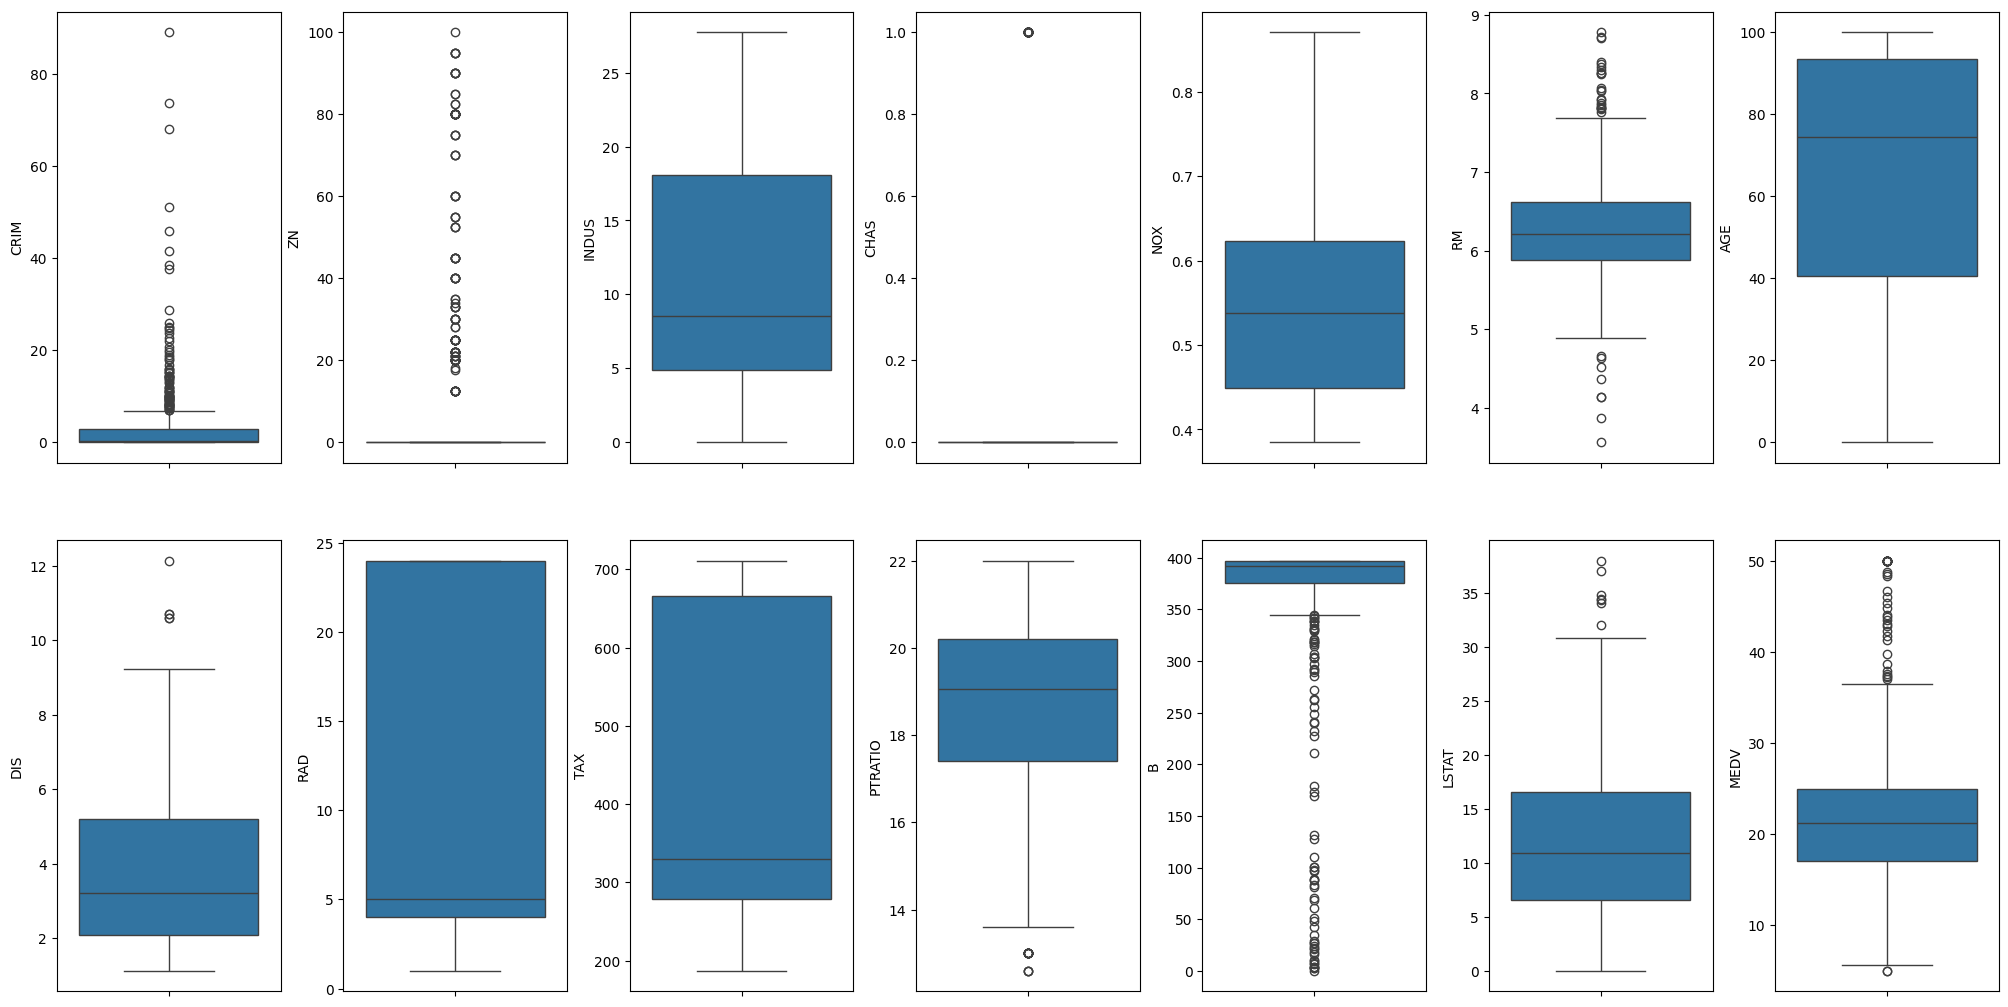

In [49]:
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col, value in data.items():
    sns.boxplot(y = col, data = data, ax = axs[index]) # type: ignore
    index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)
plt.show()

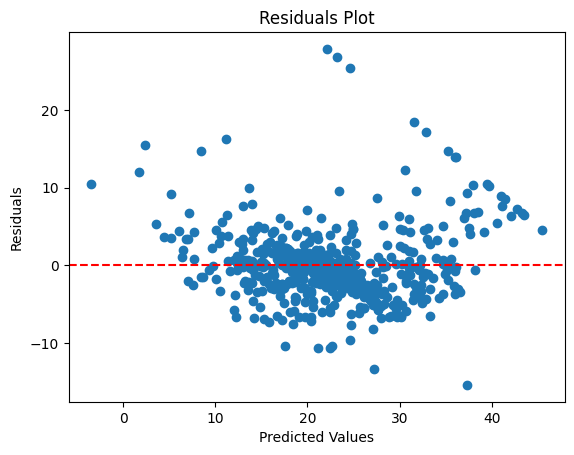

In [58]:
plt.scatter(y_pred, residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

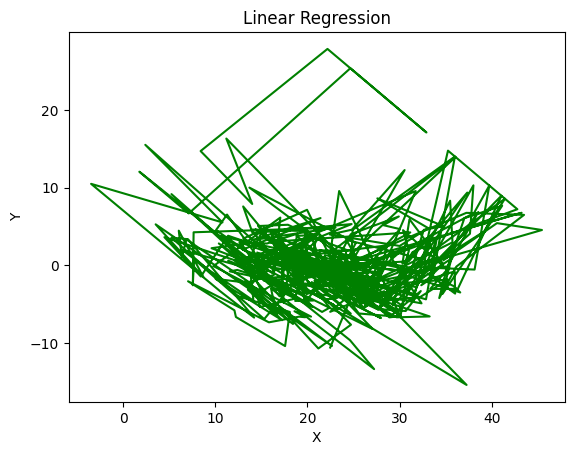

In [60]:
plt.plot(y_pred, residuals, color = 'green', label = 'Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()